In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [2]:
df = pd.read_csv('bankloans.csv')
df.head()
#default = 1(not being able to pay loan)¶

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [5]:
df.value_counts()

age  ed  employ  address  income  debtinc  creddebt  othdebt    default
20   1   4       0        14      9.7      0.200984  1.157016   1.0        1
39   1   10      4        31      4.8      0.184512  1.303488   0.0        1
         0       8        39      7.9      1.066026  2.014974   0.0        1
         2       15       22      23.1     1.915914  3.166086   1.0        1
         4       9        38      6.5      1.178190  1.291810   0.0        1
                                                                          ..
30   2   8       4        56      6.4      0.333312  3.250688   0.0        1
         10      4        22      16.1     1.409716  2.132284   0.0        1
         12      9        68      20.1     2.856612  10.811388  0.0        1
                          98      7.2      2.935296  4.120704   0.0        1
56   1   11      20       59      15.0     4.672800  4.177200   0.0        1
Name: count, Length: 700, dtype: int64

In [6]:
df.tail()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
1145,34,1,12,15,32,2.7,0.239328,0.624672,NaN
1146,32,2,12,11,116,5.7,4.026708,2.585292,NaN
1147,48,1,13,11,38,10.8,0.722304,3.381696,NaN
1148,35,2,1,11,24,7.8,0.417456,1.454544,NaN
1149,37,1,20,13,41,12.9,0.899130,4.389870,NaN


In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

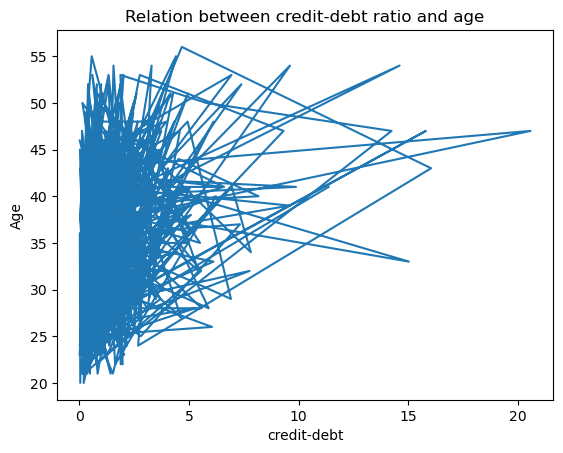

In [53]:
creddeb = df['creddebt']
agess = df['age']
plt.title("Relation between credit-debt ratio and age")
plt.xlabel("credit-debt")
plt.ylabel("Age")
plt.plot(creddeb,agess)
plt.show()

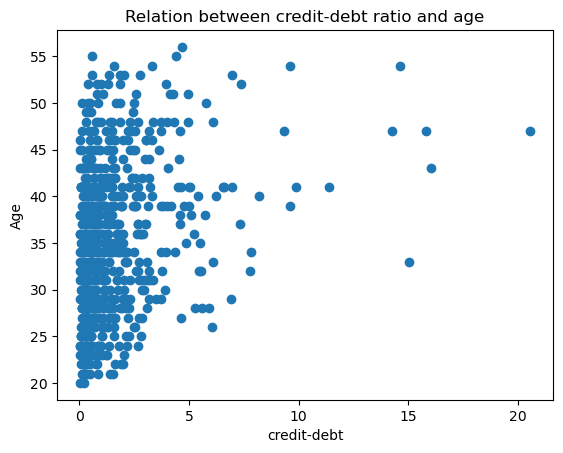

In [54]:
plt.scatter(creddeb,agess)
plt.title("Relation between credit-debt ratio and age")
plt.xlabel("credit-debt")
plt.ylabel("Age")
plt.show()

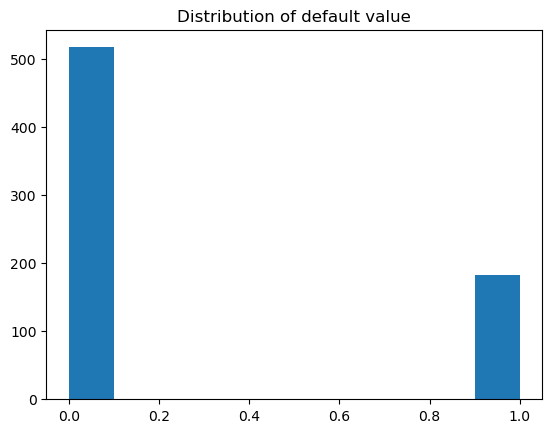

In [55]:
plt.hist(df['default'])
plt.title("Distribution of default value")
plt.show()

<Axes: title={'center': 'Relationship between Income and Age'}, xlabel='age', ylabel='income'>

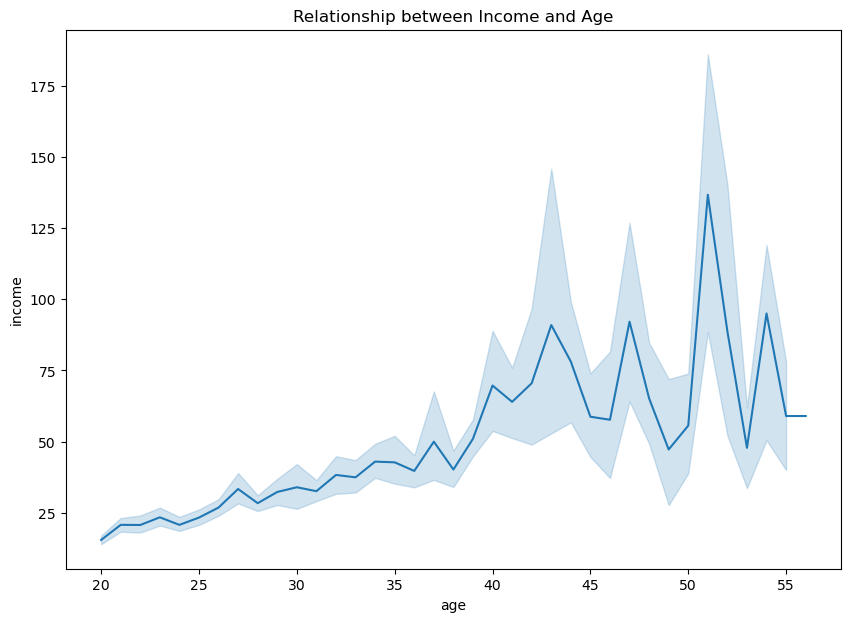

In [59]:
fig,ax = plt.subplots(figsize=(10,7))
plt.title("Relationship between Income and Age")
sns.lineplot(x='age',y='income',data=df,ax=ax)

<Axes: title={'center': 'Relationship between Debit-Income Ratio and Age'}, xlabel='age', ylabel='debtinc'>

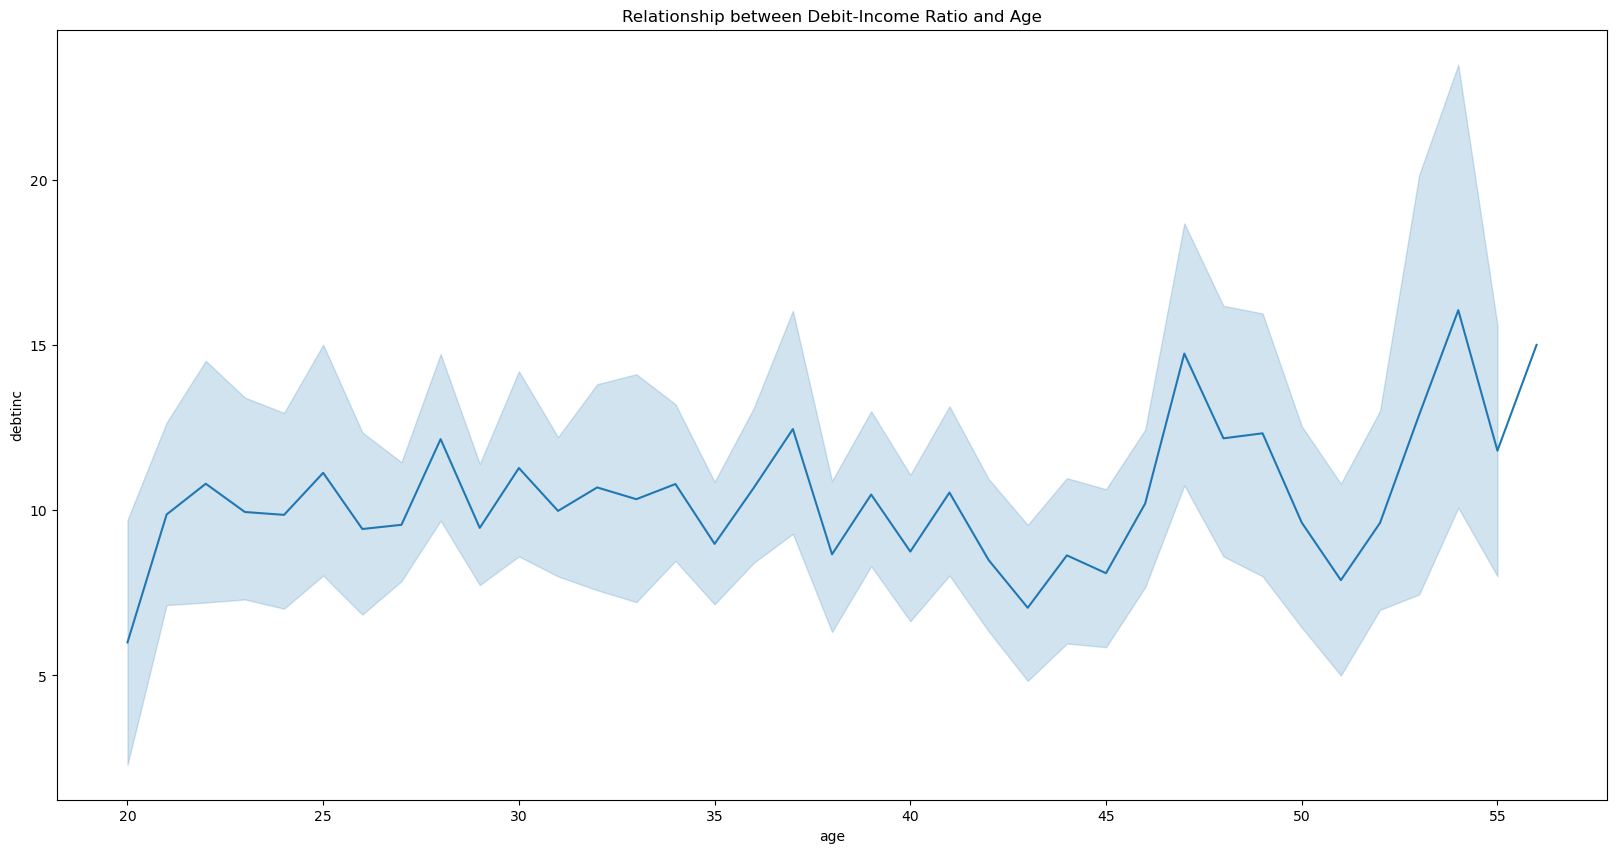

In [60]:
fig,ax = plt.subplots(figsize=(20,10))
plt.title("Relationship between Debit-Income Ratio and Age")
sns.lineplot(x='age',y='debtinc',data=df,ax=ax)

## Feature Exraction

In [11]:
df['default'].value_counts()

default
0.0    517
1.0    183
Name: count, dtype: int64

In [12]:
x=df.drop(['default'],axis=1)
y=df['default']

In [13]:
x


,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,41,3,17,12,176,9.3,11.359392,5.008608
1,27,1,10,6,31,17.3,1.362202,4.000798
2,40,1,15,14,55,5.5,0.856075,2.168925
3,41,1,15,14,120,2.9,2.658720,0.821280
4,24,2,2,0,28,17.3,1.787436,3.056564
...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938
696,29,2,6,4,21,11.5,0.369495,2.045505
697,33,1,15,3,32,7.6,0.491264,1.940736
698,45,1,19,22,77,8.4,2.302608,4.165392


(array([[602.,  98.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [700.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [700.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [700.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [460., 183.,  38.,  10.,   4.,   4.,   0.,   0.,   0.,   1.],
        [700.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [700.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [700.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([  0. ,  44.6,  89.2, 133.8, 178.4, 223. , 267.6, 312.2, 356.8,
        401.4, 446. ]),
 <a list of 8 BarContainer objects>)

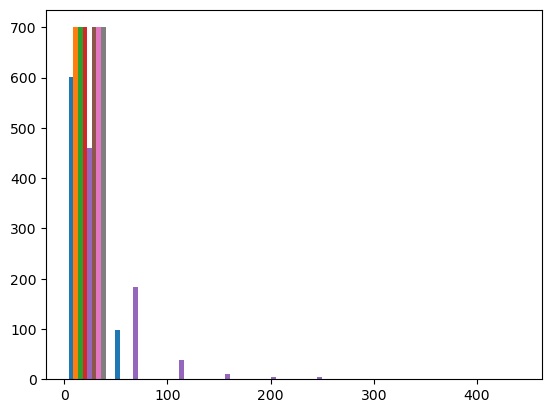

In [50]:
plt.hist(x)

In [14]:
y

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
695    1.0
696    0.0
697    0.0
698    0.0
699    0.0
Name: default, Length: 700, dtype: float64

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

#80% of x((without default) and y(only default) will be used as a training data (xtrain,ytrain)
#the rest 20% will be used as testing dat i.e. 
#x-(independent coloumns), y-(target column)

In [16]:
sc = StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

## Model Fitting

In [17]:
rfc = RandomForestClassifier(n_estimators=200)

In [18]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [24]:
y_pred=rfc.predict(xtest)

In [26]:
#accracy score
accuracy_score(ytest,y_pred)

0.8

In [19]:
rfc.score(xtest,ytest)

0.8

In [28]:
recall= recall_score(ytest,y_pred,average='weighted')
recall

0.8

In [29]:
sv = SVC()
sv.fit(xtrain,ytrain)

SVC()

In [30]:
sv.score(xtest,ytest)

0.7928571428571428

In [31]:
model = GridSearchCV(sv,{
    'C':[0.1,0.2,0.4,0.8,1.2,1.8,4.0,7.0],
    'gamma':[0.1,0.4,0.8,1.0,2.0,3.0],
    'kernel':['rbf','linear']
},scoring='accuracy',cv=10)

In [32]:
model.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [33]:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [34]:
model2 = SVC(C=0.1,gamma=0.1,kernel='linear')
model2.fit(xtrain,ytrain)
model2.score(xtest,ytest)

0.8214285714285714

In [35]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.8357142857142857

In [40]:
yp = lr.predict(xtest)


In [39]:
accuracy_score(ytest,yp)

0.8357142857142857

<Axes: >

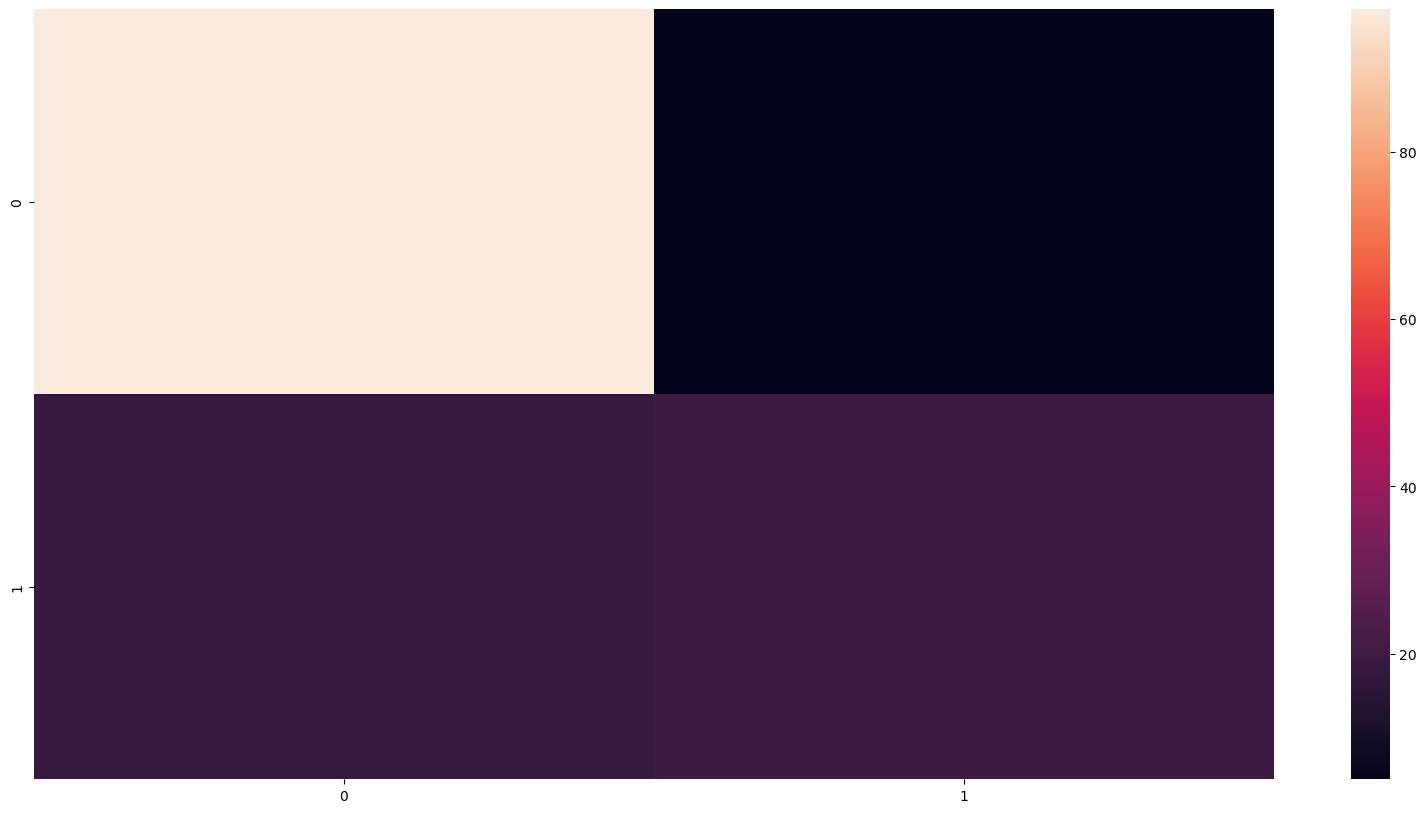

In [38]:
c= confusion_matrix(ytest,yp)
fig ,ax = plt.subplots(figsize=(20,10))
sns.heatmap(c,ax=ax)